In [1]:
%matplotlib inline
from matplotlib import pyplot as plt
import numpy as np
import torch

torch.set_printoptions(edgeitems=2, linewidth=75)
torch.manual_seed(123)

In [4]:
from torchvision import datasets
data_path = '../data-unversioned/p1ch7/'
cifar10 = datasets.CIFAR10(data_path, train=True, download=False) # <1>
cifar10_val = datasets.CIFAR10(data_path, train=False, download=False) # <2>

Files already downloaded and verified
Files already downloaded and verified


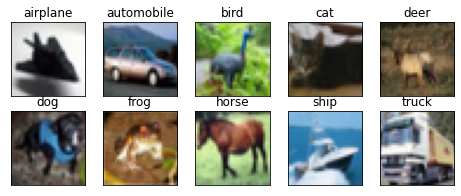

In [5]:
class_names = ['airplane','automobile','bird','cat','deer',
               'dog','frog','horse','ship','truck']

fig = plt.figure(figsize=(8,3))
num_classes = 10
for i in range(num_classes):
    ax = fig.add_subplot(2, 5, 1 + i, xticks=[], yticks=[])
    ax.set_title(class_names[i])
    img = next(img for img, label in cifar10 if label == i)
    plt.imshow(img)
plt.show()

In [6]:
type(cifar10).__mro__

(torchvision.datasets.cifar.CIFAR10,
 torchvision.datasets.vision.VisionDataset,
 torch.utils.data.dataset.Dataset,
 object)

In [7]:
len(cifar10)

50000

In [8]:
img, label = cifar10[99]
img, label, class_names[label]

(<PIL.Image.Image image mode=RGB size=32x32 at 0x191F8E2E320>, 1, 'automobile')

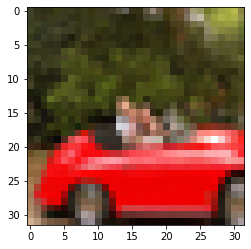

In [9]:
plt.imshow(img)
plt.show()

In [10]:
from torchvision import transforms
dir(transforms)

['CenterCrop',
 'ColorJitter',
 'Compose',
 'ConvertImageDtype',
 'FiveCrop',
 'Grayscale',
 'Lambda',
 'LinearTransformation',
 'Normalize',
 'PILToTensor',
 'Pad',
 'RandomAffine',
 'RandomApply',
 'RandomChoice',
 'RandomCrop',
 'RandomErasing',
 'RandomGrayscale',
 'RandomHorizontalFlip',
 'RandomOrder',
 'RandomPerspective',
 'RandomResizedCrop',
 'RandomRotation',
 'RandomSizedCrop',
 'RandomVerticalFlip',
 'Resize',
 'Scale',
 'TenCrop',
 'ToPILImage',
 'ToTensor',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 'functional',
 'functional_pil',
 'functional_tensor',
 'transforms']

In [11]:
from torchvision import transforms

to_tensor = transforms.ToTensor()
img_t = to_tensor(img)
img_t.shape

torch.Size([3, 32, 32])

In [12]:
tensor_cifar10 = datasets.CIFAR10(data_path, train=True, download=False,
                          transform=transforms.ToTensor())

In [13]:
img_t, _ = tensor_cifar10[99]
type(img_t)

torch.Tensor

In [14]:
img_t.shape, img_t.dtype

(torch.Size([3, 32, 32]), torch.float32)

In [15]:
img_t.min(), img_t.max()

(tensor(0.), tensor(1.))

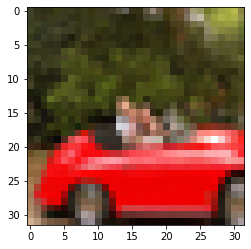

In [16]:
plt.imshow(img_t.permute(1, 2, 0))  # <1>
plt.show()

In [17]:
imgs = torch.stack([img_t for img_t, _ in tensor_cifar10], dim=3)
imgs.shape

torch.Size([3, 32, 32, 50000])

In [18]:
imgs.view(3, -1).mean(dim=1)  # <1>

tensor([0.4915, 0.4823, 0.4468])

In [26]:
imgs.view(3, -1).shape

torch.Size([3, 51200000])

In [19]:
imgs.view(3, -1).std(dim=1)

tensor([0.2470, 0.2435, 0.2616])

In [20]:
transforms.Normalize((0.4915, 0.4823, 0.4468), (0.2470, 0.2435, 0.2616))

Normalize(mean=(0.4915, 0.4823, 0.4468), std=(0.247, 0.2435, 0.2616))

In [21]:
transformed_cifar10 = datasets.CIFAR10(
    data_path, train=True, download=False,
    transform=transforms.Compose([
        transforms.ToTensor(),
        transforms.Normalize((0.4915, 0.4823, 0.4468),
                             (0.2470, 0.2435, 0.2616))
    ]))

In [22]:
transformed_cifar10_val = datasets.CIFAR10(
    data_path, train=False, download=False,
    transform=transforms.Compose([
        transforms.ToTensor(),
        transforms.Normalize((0.4915, 0.4823, 0.4468),
                             (0.2470, 0.2435, 0.2616))
    ]))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


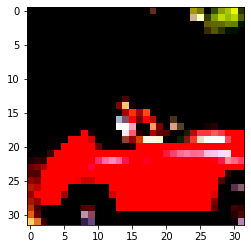

In [23]:
img_t, _ = transformed_cifar10[99]

plt.imshow(img_t.permute(1, 2, 0))
plt.show()

In [27]:
img_t[0,:10]

tensor([[-1.0055, -1.1960, -1.2595, -1.2119, -1.0531, -1.0690, -1.0690,
         -1.1643, -1.0849, -1.1325, -1.0531, -1.0373, -0.9579, -0.6880,
         -0.4340, -1.1484, -1.1484, -0.4975,  0.3916, -0.4181, -0.7991,
         -0.6404, -0.2276, -0.0529,  0.6774,  0.4551, -0.1958,  0.1852,
          0.5504,  0.6615,  0.9156,  0.1852],
        [-0.9896, -1.1167, -1.1643, -1.1008, -1.0531, -1.0531, -1.1802,
         -1.2119, -1.0849, -1.1167, -1.0373, -1.0373, -1.2278, -1.2754,
         -1.4183, -1.4024, -1.2278, -0.8626, -0.7039, -0.7356, -1.0214,
         -0.6562, -0.4498,  0.0265,  0.8203,  1.1379,  0.2011,  0.4869,
          0.7568,  0.5980,  0.7251,  0.3123],
        [-1.0690, -0.9738, -1.1008, -1.1325, -1.1484, -1.2595, -1.0690,
         -1.0849, -1.1325, -1.1643, -1.0055, -1.0055, -1.1484, -1.3231,
         -1.3072, -1.3072, -1.2437, -1.2754, -1.1960, -1.3072, -1.2119,
         -0.8785, -0.7674, -0.5451, -0.1323, -0.0053,  0.4075,  0.3599,
          0.3916,  0.4393,  0.3916, -0.0370]